# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Ines Alejandro Garcia Mosqueda

- ID: A00834571

- My carreer: IRS


# Importing libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import numpy as np

# PART 1
# Use your assigned dataset

## A1 Load data

In [6]:
url = "A00834571.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,x1,x2
0,0,-0.797121,-0.536007
1,1,0.054681,-0.443100
2,2,0.643588,-0.637452
3,3,0.224951,-0.074174
4,4,1.439314,0.381042
...,...,...,...
1495,1495,1.492791,0.296349
1496,1496,1.929797,-0.291190
1497,1497,0.427135,0.289280
1498,1498,0.970611,-0.070772


## A2 Data managment


Print the first 7 rows

In [7]:
df.head(7)

,Unnamed: 0,x1,x2
0,0,-0.797121,-0.536007
1,1,0.054681,-0.443100
2,2,0.643588,-0.637452
3,3,0.224951,-0.074174
4,4,1.439314,0.381042
5,5,1.176617,0.404235
6,6,0.502617,0.482083


Print the first 4 last rows

In [8]:
df.tail(7)

,Unnamed: 0,x1,x2
1493,1493,0.046153,-0.996269
1494,1494,-0.912111,-0.439702
1495,1495,1.492791,0.296349
1496,1496,1.929797,-0.291190
1497,1497,0.427135,0.289280
1498,1498,0.970611,-0.070772
1499,1499,0.381843,0.270761


How many rows and columns are in your data?

Use the `shape` method


In [9]:
df.shape[0]

1500

Print the name of all columns 

Use the `columns` method

In [10]:
df.shape[1]

3

What is the data type in each column

Use the `dtypes` method 

In [11]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
dtype: object

What is the meaning of rows and columns?

In [12]:
# Your responses here

# 1) En las filas se encuentran valores flotantes con signo, lo que podria ser alguna coordenada

# 2) En las columnas existen dos variables que podrian representar latitud y altitud

# 3) la  varubale index solamente es ell index

#...

Print a statistical summary of your columns


In [13]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0        x1        x2
0              0 -0.797121 -0.536007
1              1  0.054681 -0.443100
2              2  0.643588 -0.637452
3              3  0.224951 -0.074174
4              4  1.439314  0.381042
...          ...       ...       ...
1495        1495  1.492791  0.296349
1496        1496  1.929797 -0.291190
1497        1497  0.427135  0.289280
1498        1498  0.970611 -0.070772
1499        1499  0.381843  0.270761

[1500 rows x 3 columns]>

In [14]:
# 1) What is the minumum and maximum values of each variable
print("Minimo")
print(df.min())

print("\nMaximo")
print(df.max())

# 2) What is the mean and standar deviation of each variable
print("\nPromedio")
print(df.mean())
print("\nStandar deviation")
print(df.std())

# 3) What the 25%, 50% and 75% represent?
print("\n25%")
print(df.quantile(q = 0.25))
print("\n50%")
print(df.quantile(q = 0.50))
print("\n75%")
print(df.quantile(q = 0.75))


Minimo
Unnamed: 0    0.000000
x1           -1.113993
x2           -1.167963
dtype: float64

Maximo
Unnamed: 0    1499.000000
x1               2.081830
x2               0.591081
dtype: float64

Promedio
Unnamed: 0    749.500000
x1              0.500250
x2             -0.249742
dtype: float64

Standar deviation
Unnamed: 0    433.157015
x1              0.870471
x2              0.496196
dtype: float64

25%
Unnamed: 0    374.750000
x1             -0.042790
x2             -0.706172
Name: 0.25, dtype: float64

50%
Unnamed: 0    749.500000
x1              0.497174
x2             -0.238225
Name: 0.5, dtype: float64

75%
Unnamed: 0    1124.250000
x1               1.053517
x2               0.201819
Name: 0.75, dtype: float64


Rename the columns using the same name with capital letters

In [15]:
df.columns = ["INDEX", "X1", "X2"]
df

,INDEX,X1,X2
0,0,-0.797121,-0.536007
1,1,0.054681,-0.443100
2,2,0.643588,-0.637452
3,3,0.224951,-0.074174
4,4,1.439314,0.381042
...,...,...,...
1495,1495,1.492791,0.296349
1496,1496,1.929797,-0.291190
1497,1497,0.427135,0.289280
1498,1498,0.970611,-0.070772


Rename the columns to their original names

In [16]:
df.columns = ["index", "x1", "x2"]
df

,index,x1,x2
0,0,-0.797121,-0.536007
1,1,0.054681,-0.443100
2,2,0.643588,-0.637452
3,3,0.224951,-0.074174
4,4,1.439314,0.381042
...,...,...,...
1495,1495,1.492791,0.296349
1496,1496,1.929797,-0.291190
1497,1497,0.427135,0.289280
1498,1498,0.970611,-0.070772


Use two different alternatives to get one of the columns

In [17]:
print(df["x1"])
pd.DataFrame(data=df, columns=["x1", "x2"])

0      -0.797121
1       0.054681
2       0.643588
3       0.224951
4       1.439314
          ...   
1495    1.492791
1496    1.929797
1497    0.427135
1498    0.970611
1499    0.381843
Name: x1, Length: 1500, dtype: float64


,x1,x2
0,-0.797121,-0.536007
1,0.054681,-0.443100
2,0.643588,-0.637452
3,0.224951,-0.074174
4,1.439314,0.381042
...,...,...
1495,1.492791,0.296349
1496,1.929797,-0.291190
1497,0.427135,0.289280
1498,0.970611,-0.070772


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [18]:
df.loc[62:72, ["x1","x2"]]

,x1,x2
62,0.293253,0.213677
63,0.052874,-0.304468
64,0.954921,0.514791
65,0.063338,-0.383944
66,-0.913452,-0.162764
67,0.830298,0.490101
68,0.626727,-0.749626
69,1.894390,-0.140548
70,1.538665,0.345938
71,0.370525,0.460609


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [19]:
print("Not null")
print(df.notnull().sum())

print("\nNull")
print(df.isnull().sum())

print("\nObservaciones:")
df.shape[0]

Not null
index    1500
x1       1500
x2       1500
dtype: int64

Null
index    0
x1       0
x2       0
dtype: int64

Observaciones:


1500

Discard the last column


In [20]:
df.drop(df.columns[[0]], axis = 1, inplace = True)
df

,x1,x2
0,-0.797121,-0.536007
1,0.054681,-0.443100
2,0.643588,-0.637452
3,0.224951,-0.074174
4,1.439314,0.381042
...,...,...
1495,1.492791,0.296349
1496,1.929797,-0.291190
1497,0.427135,0.289280
1498,0.970611,-0.070772


### Questions 

Based on the previos results, provide a description of yout dataset

Your response:




## A3 Data visualization

Plot in the same figure the histogram of the two variables

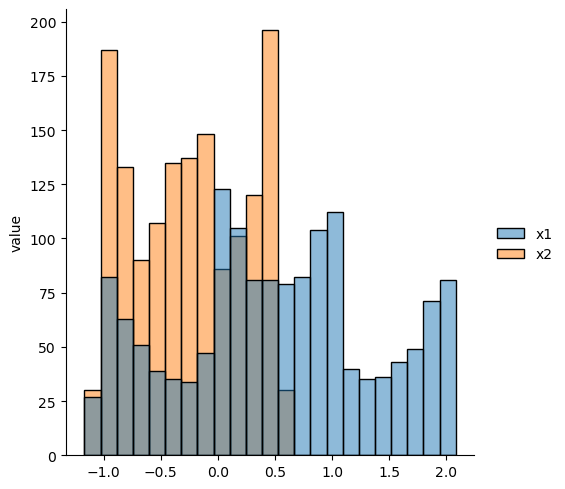

In [21]:
sns.displot(df[["x1","x2"]])
plt.ylabel("value")
plt.show()


Based on this plots, provide a description of your data:

Your response here: la distribucion de datos de x1 tiene un rango mas amplio de datos, en cambio la distribucion de datos de x2 esta mas concentrada en un rango de -1.25 a 0

Plot in the same figure the boxplot of the two variables 

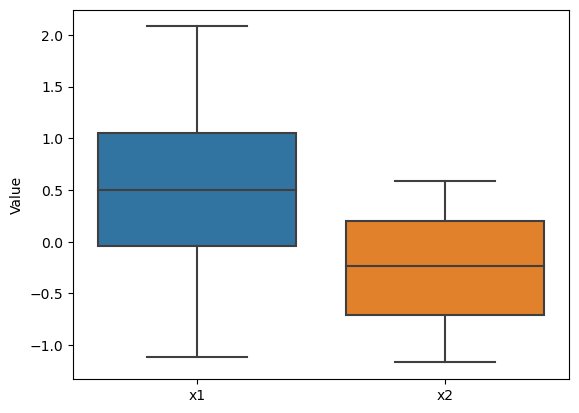

In [22]:
x = df.loc[:, ["x1", "x2"]]
bplot  = sns.boxplot(data=x, orient= "v")

plt.ylabel("Value")
plt.show()

Scatter plot of the two variables

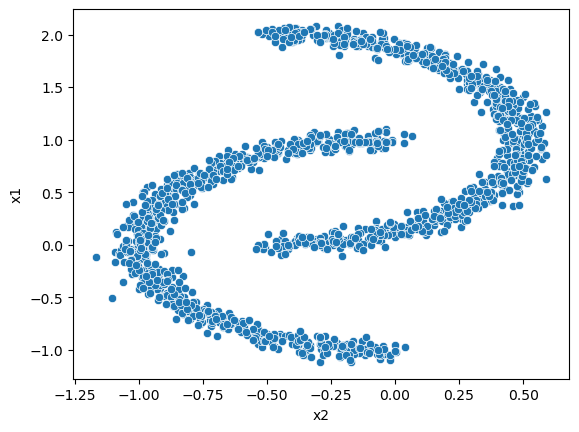

In [23]:
sns.scatterplot(data = x, y = "x1", x ="x2")
plt.show()

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response:
En las graficas se puede notar que dentro de las "coordenadas" (x1, x2) existen dos grupos 



## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [24]:
K  = 2
km = KMeans(n_clusters = K, n_init = "auto")
yestimated = km.fit_predict(df)
yestimated

C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1])

Add to your dataset a column with the assihned cluster to each data point

In [25]:
df["yestimated"] = yestimated
df.head()

,x1,x2,yestimated
0,-0.797121,-0.536007,0
1,0.054681,-0.443100,0
2,0.643588,-0.637452,0
3,0.224951,-0.074174,0
4,1.439314,0.381042,1


Print the number associated to each cluster

In [26]:
df.yestimated.unique()

array([0, 1])

Print the centroids

In [27]:
km.cluster_centers_

array([[-0.21010782, -0.57818919],
       [ 1.19376126,  0.07091539]])

Print the intertia metric

In [28]:
km.inertia_

607.9281773111154

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

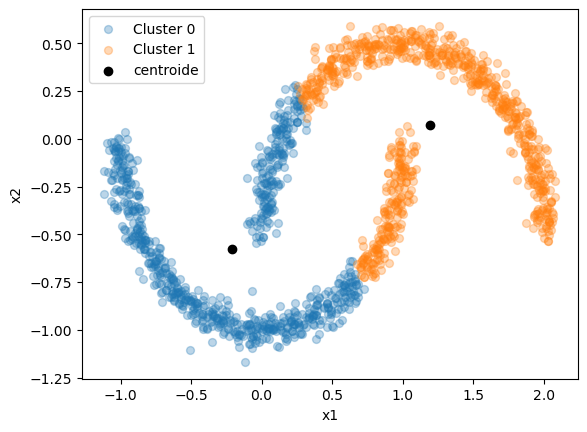

In [29]:
df_cluster0 = df[df.yestimated ==0]
df_cluster1 = df[df.yestimated ==1]

# Scatter plot of each cluster

plt.scatter(df_cluster0.x1, df_cluster0.x2, label = "Cluster 0", marker="o", s=32, alpha=0.3)
plt.scatter(df_cluster1.x1, df_cluster1.x2, label = "Cluster 1", marker="o", s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="black", label = "centroide")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

### Questions 

Provides a detailed description of your results

Your response: Inicialmente yo esperaba el algoritmo separara los cluster de manera diferente, de forma que cada C fuera un grupo, pero analizando un poco esto se deve un poco por el algoritmo que se implemento

## A5 Elbow plot

Compute the Elbow plot

C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans 

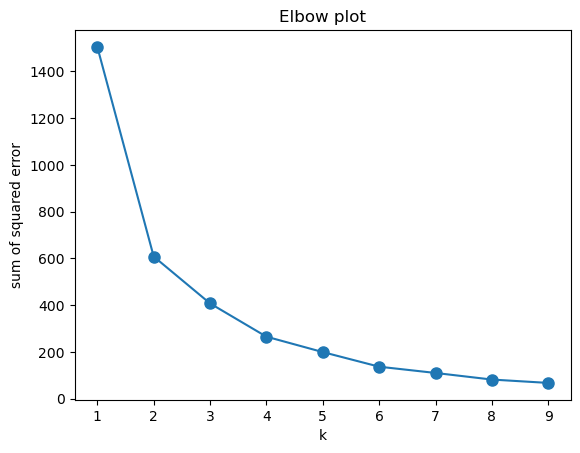

In [30]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters = k, n_init = "auto")
    km.fit_predict(df[["x1", "x2"]])
    sse.append(km.inertia_)
    
plt.plot(k_rng, sse, "o-", markersize = 8)
plt.title("Elbow plot")
plt.xlabel("k")
plt.ylabel("sum of squared error")
plt.show()

### Questions 

What is the best number of clusters K? (argue your response)

Your response: dado a que el error cuadratico se reduce de manera drastica al llegar a dos clusters, podemos inlclinarnos por usar de 2 a 4 clusters


Does this number of clusters agree with your inital guess? (argue your response)

Your response: si concuerda con la decicion de tener solamente 2 clusters, ya que visualmente podemos observar q se forman conjuntos de datos en dos grupos



# PART 2
# Load and do clustering using the "digits" dataset

1) Load the dataset using the "load_digits()" function from "sklearn.datasets"


In [31]:
dg = load_digits(as_frame=True)
print(dg.data.shape)
dg.data

(1797, 64)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


2) Plot some of the observations

In [32]:
print(dg.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 640x480 with 0 Axes>

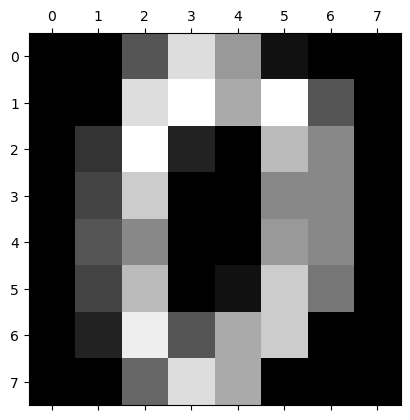

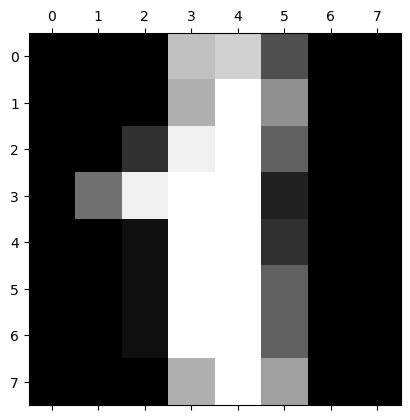

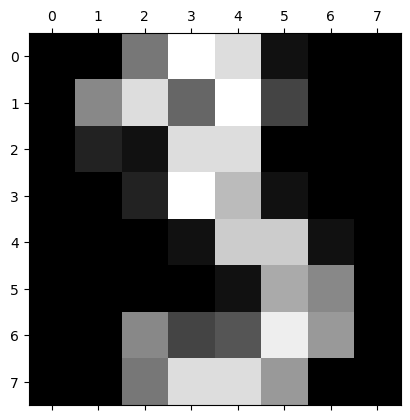

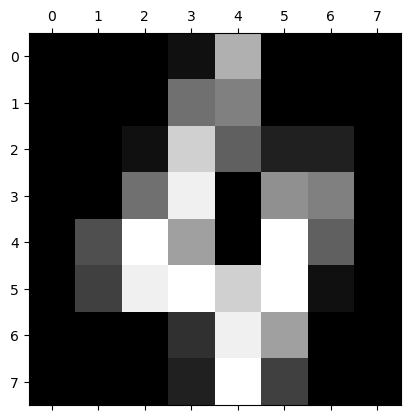

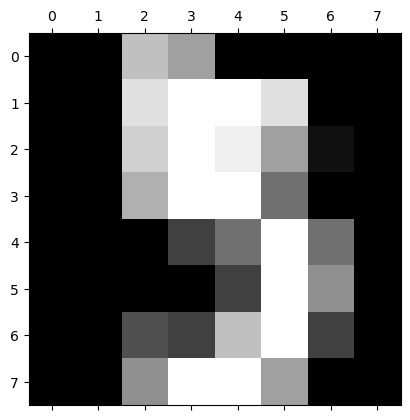

In [33]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dg.images[0])
plt.matshow(dg.images[1])
plt.matshow(dg.images[3])
plt.matshow(dg.images[4])
plt.matshow(dg.images[5])
plt.show()

3) Do K means clustering 

4) Verify your results in any of the observations

C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\codeee\anacnda\envs\ProyectoIot\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


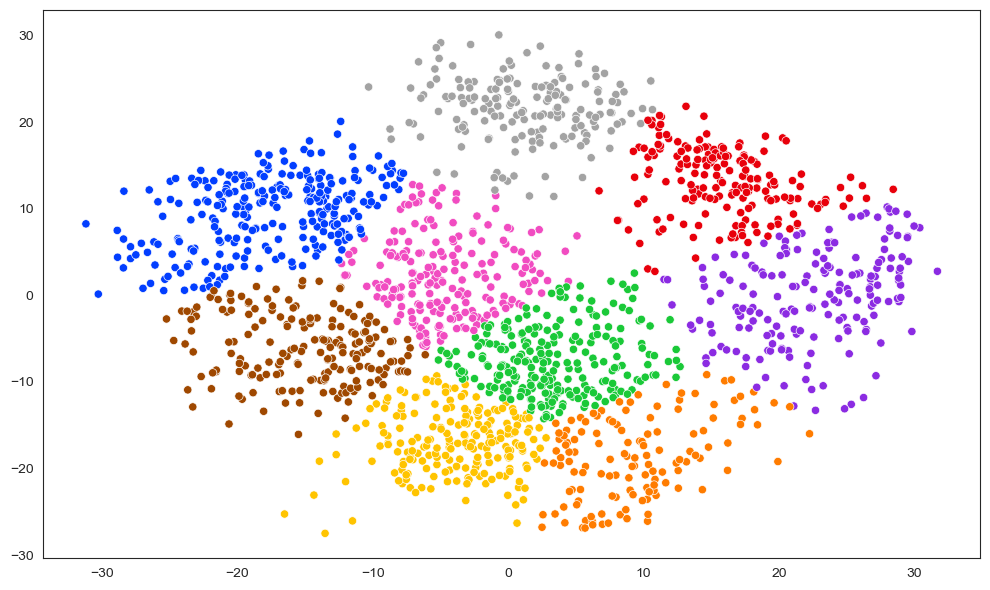

In [36]:
from sklearn.decomposition import PCA

digits = load_digits()
df = pd.DataFrame(digits.data, columns=[f"pixel_{i}" for i in range(digits.data.shape[1])])
df['digit'] = digits.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.iloc[:, :-1])

kmeans = KMeans(n_clusters=9, random_state=42)
labels = kmeans.fit_predict(X_pca)

sns.set_style('white')
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='bright', legend=False, ax=ax)
plt.tight_layout()
plt.show()

In [38]:
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [39]:
X_pca

array([[ -1.25946114,  21.27487991],
       [  7.95761345, -20.76870209],
       [  6.99191629,  -9.95598045],
       ...,
       [ 10.80128947,  -6.96025789],
       [ -4.87208167,  12.42393967],
       [ -0.34438406,   6.36554475]])

### Questions 

Provides a detailed description of your results.

Your response: En el modelo se logra ver los diferentes subconjuntos que se obtuvieron de los mapas de bit para poder analizar y crear una prediccion para determinar un numero dado el map de bits

# PART 3
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Aprendi sobre la importancia de la estadistica en el proceso de creacion de modelos de machine learning y la implentacion de los mismos con programacion 

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Puedo desarrollar modelos que apartir de distintas variables logren crear conjuntos relevantes para la prediccion del modelo